In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, csv file
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
import os
print(os.listdir("C:\\Users\\Deepak Jaiswal\\Desktop\\Bank loan prediction"))

['credit_test.csv', 'credit_train.csv', 'dataset-for-bank-loan-prediction.zip']


In [4]:
from sklearn import metrics
from time import time

In [5]:
df = pd.read_csv("C:\\Users\\Deepak Jaiswal\\Desktop\\Bank loan prediction\\credit_train.csv")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


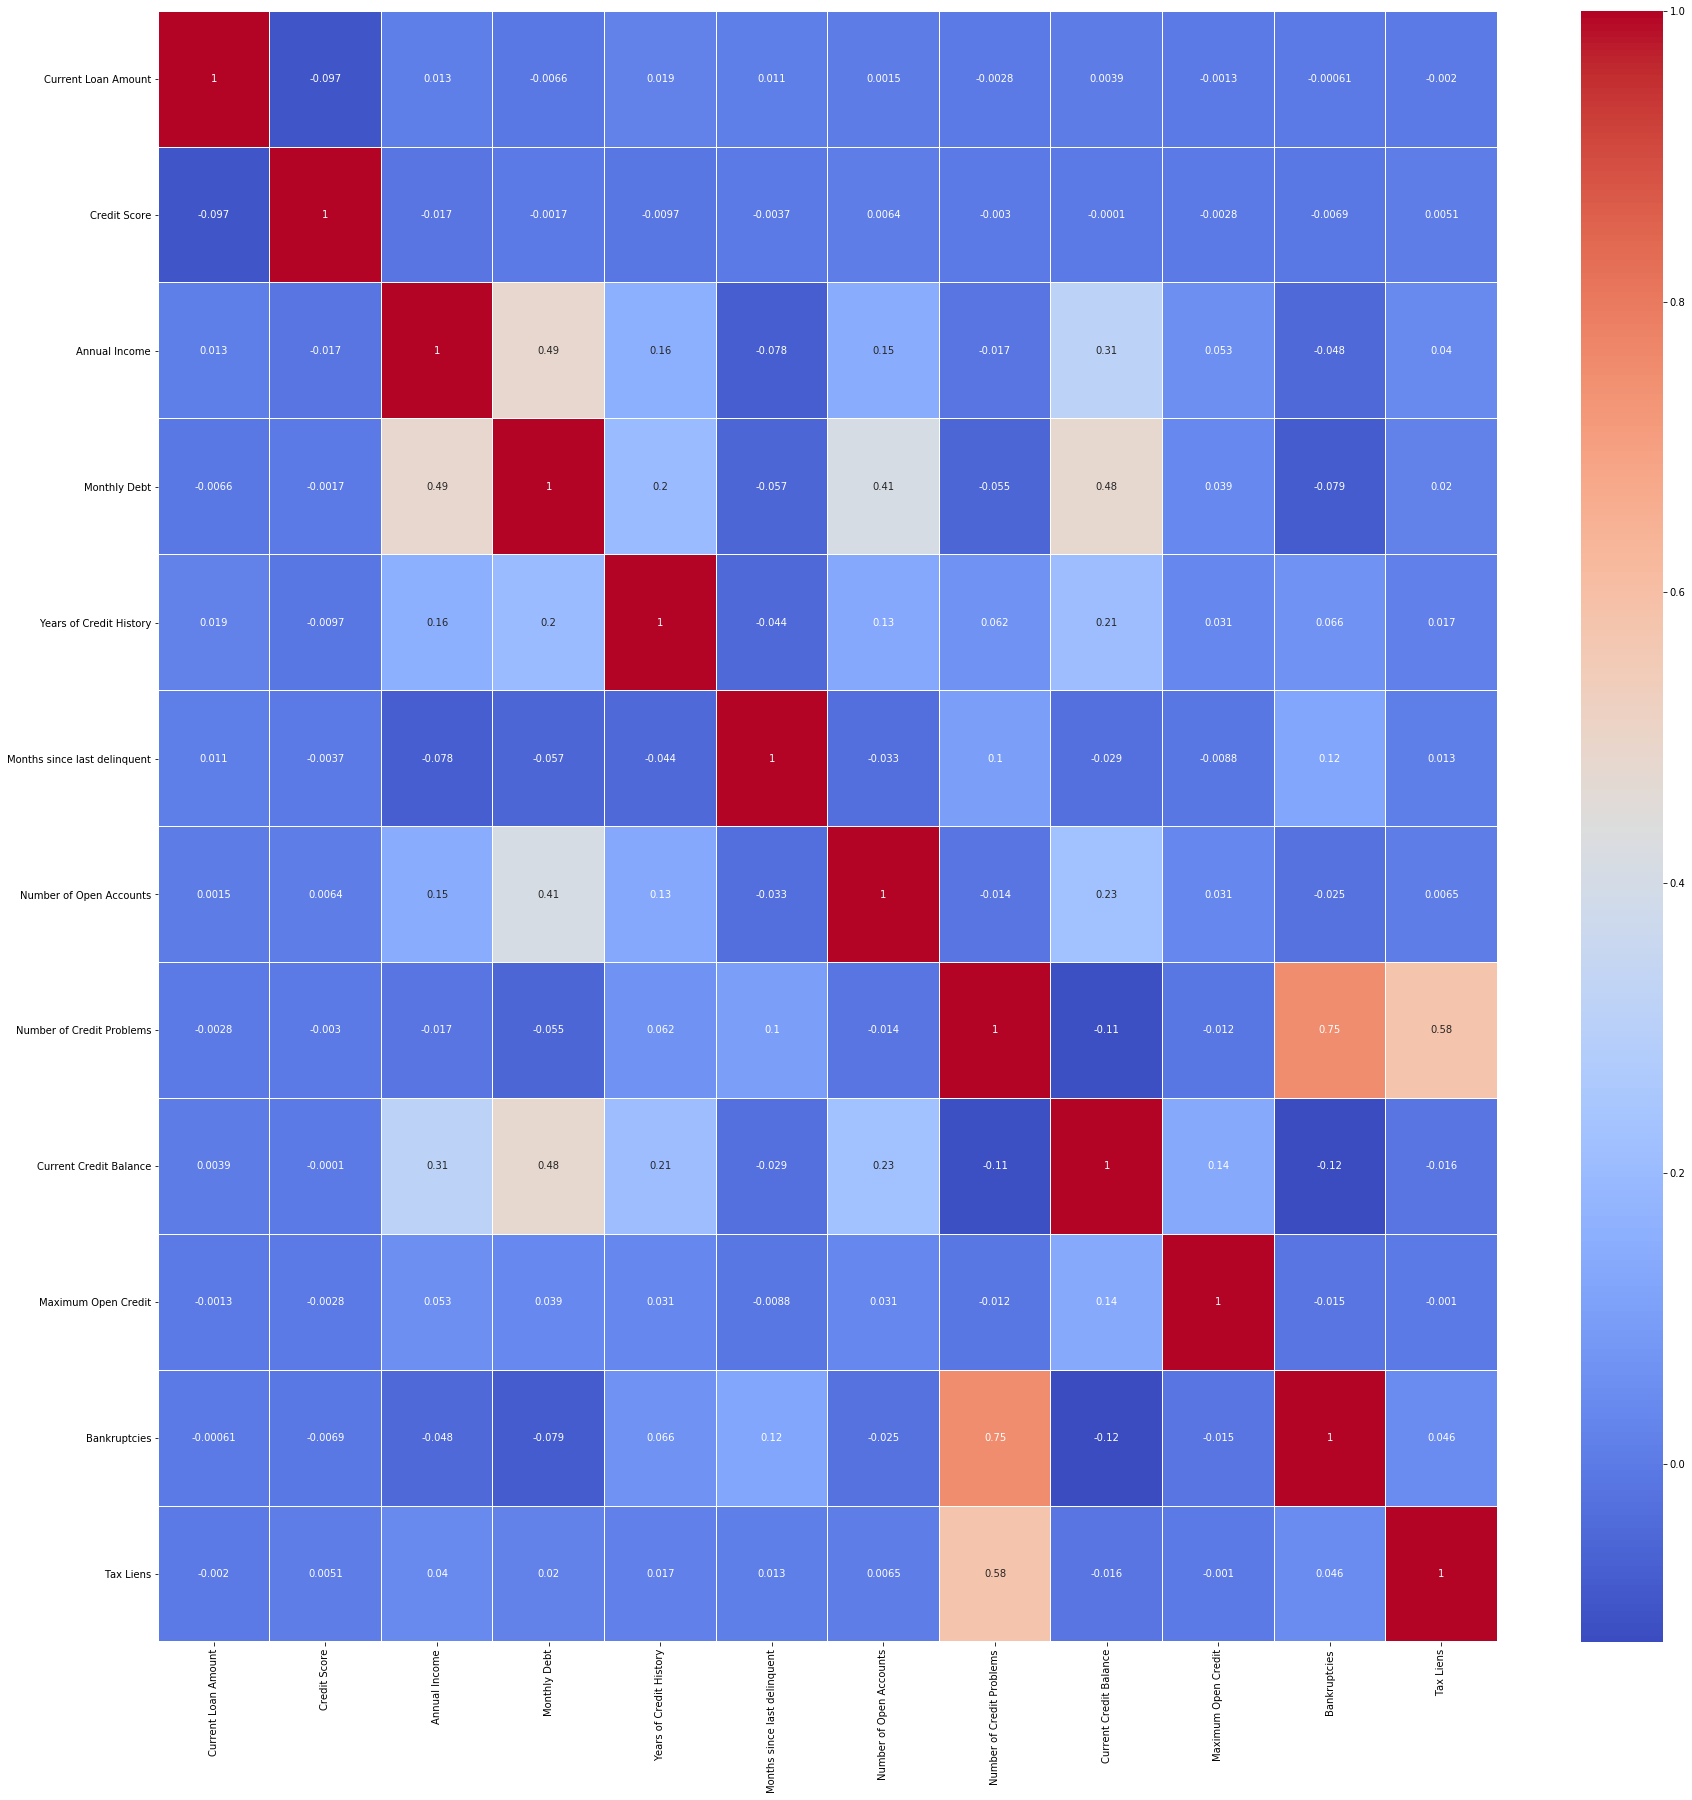

In [7]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.01 ,cmap='coolwarm', cbar=True)
plt.show()

In [9]:
features =['Number of Credit Problems', 'Bankruptcies', 'Tax Liens', 'Loan Status']
dfRisco = df[features]
dfRisco.head()

,Number of Credit Problems,Bankruptcies,Tax Liens,Loan Status
0,1.0,1.0,0.0,Fully Paid
1,0.0,0.0,0.0,Fully Paid
2,1.0,0.0,0.0,Fully Paid
3,0.0,0.0,0.0,Fully Paid
4,0.0,0.0,0.0,Fully Paid


In [10]:
dfRisco.describe()

,Number of Credit Problems,Bankruptcies,Tax Liens
count,100000.000000,99796.000000,99990.000000
mean,0.168310,0.117740,0.029313
std,0.482705,0.351424,0.258182
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,15.000000,7.000000,15.000000


In [11]:
dfRisco.isnull()

,Number of Credit Problems,Bankruptcies,Tax Liens,Loan Status
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [13]:
dfRiscoLimpo = dfRisco[df['Number of Credit Problems'].notnull() & df['Bankruptcies'].notnull() & df['Tax Liens'].notnull() & df['Loan Status'].notnull()]
dfRiscoLimpo.describe()

,Number of Credit Problems,Bankruptcies,Tax Liens
count,99796.000000,99796.000000,99796.00000
mean,0.168574,0.117740,0.02937
std,0.483083,0.351424,0.25843
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.00000
max,15.000000,7.000000,15.00000


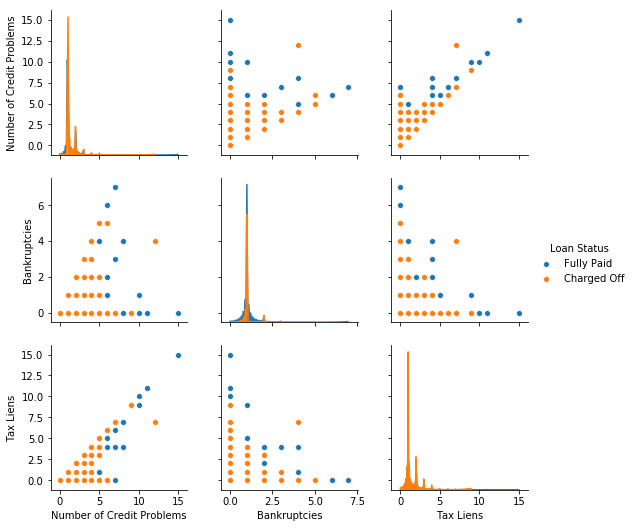

In [14]:
sns.pairplot(data=dfRiscoLimpo, hue='Loan Status')

In [15]:
x =dfRiscoLimpo[features[:3]]
y =dfRiscoLimpo[features[3:]]
x.head()

,Number of Credit Problems,Bankruptcies,Tax Liens
0,1.0,1.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(len(x_train),len(x_test))

79836 19960


In [18]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

tempoTreinamento =time()
nb.fit(x_train,y_train)
tempoTreinamento = time() - tempoTreinamento

tempoPredicao = time()
predicao = nb.predict(x_test)
tempoPredicao = time() - tempoPredicao

acuracia = metrics.accuracy_score(predicao, y_test)

comparaClassificadores = pd.DataFrame([['Naive Bayes',acuracia, tempoTreinamento, tempoPredicao]],columns=['Classificador', 'Acuracia', '(t)Treinamento','(t)Predicao'])

print('A acuracia do naive bayes foi: ',acuracia)

C:\Users\Deepak Jaiswal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acuracia do naive bayes foi:  0.7627755511022044


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

tempoTreinamento = time()
dtc.fit(x_train,y_train)
tempoTreinamento = time() - tempoTreinamento

tempoPredicao = time()
predicao = dtc.predict(x_test)
tempoPredicao = -time() - tempoPredicao

accuracia = metrics.accuracy_score(predicao,y_test)

comparaClassificadores.append(pd.DataFrame([['DecisionTreeClassifier', acuracia,tempoTreinamento, tempoPredicao]]))

print('A acuracia do DecisionTreeClassifier foi: ',metrics.accuracy_score(predicao,y_test))

A acuracia do DecisionTreeClassifier foi:  0.7717935871743486


In [21]:
from sklearn import svm
svc =svm.SVC()

tempoTreinamento = time()
svc.fit(x_train,y_train)
tempoTreinamento = time() - tempoTreinamento

tempoPredicao = time()
predicao = svc.predict(x_test)
tempoPredicao = tempoPredicao - time()

accuracia = metrics.accuracy_score(predicao, y_test)

comparaClassificadores.append([['SVC',acuracia,tempoTreinamento,tempoPredicao]])

print('A acuracia do SVC foi:',metrics.accuracy_score(predicao,y_test))


C:\Users\Deepak Jaiswal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Deepak Jaiswal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


A acuracia do SVC foi: 0.7719438877755511


In [22]:
comparaClassificadores

,Classificador,Acuracia,(t)Treinamento,(t)Predicao
0,Naive Bayes,0.762776,0.321346,0.040263


In [27]:
dfRiscoLimpo[:3]

,Number of Credit Problems,Bankruptcies,Tax Liens,Loan Status
0,1.0,1.0,0.0,Fully Paid
1,0.0,0.0,0.0,Fully Paid
2,1.0,0.0,0.0,Fully Paid


In [34]:
parametros = [[1.0,0.0,0.0]]
print("Deepak: " + svc.predict(parametros))

['Deepak: Fully Paid']


In [33]:
parametros = [[1.0,0.0,0.0]]
print("Risco de: " + svc.predict(parametros))

['Risco de: Fully Paid']
